In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Groupify 

In [39]:
df = pd.DataFrame()
dir_files = os.listdir("./Loom Data 09:20/Loom Data/Eye-all/")

for f in dir_files:
    if f[0] == '.': # Ignore other files
        continue
    print(f)
    temp_df = pd.read_csv("./Loom Data 09:20/Loom Data/Eye-all/" + str(f), delimiter=",")
    display(temp_df.participant.unique())
    df = pd.concat([df, temp_df], ignore_index=True)

df.shape

analytics2-p14.csv


array(['P14'], dtype=object)

analytics2-p28.csv


array(['P28'], dtype=object)

analytics2-p16.csv


array(['P16'], dtype=object)

analytics2-p13.csv


array(['P13'], dtype=object)

analytics2-p12.csv


array(['P12'], dtype=object)

analytics2-p10.csv


array(['P10'], dtype=object)

analytics2-p11.csv


array(['P11'], dtype=object)

analytics2-p8.csv


array(['P8'], dtype=object)

analytics2-p9.csv


array(['P9'], dtype=object)

analytics2-p4.csv


array(['P4'], dtype=object)

analytics2-p5.csv


array(['P6'], dtype=object)

analytics2-p7.csv


array(['P7'], dtype=object)

analytics2-p6.csv


array(['P6'], dtype=object)

analytics2-p3.csv


array(['P3'], dtype=object)

analytics2-p20.csv


array(['P20'], dtype=object)

analytics2-p21.csv


array(['P21'], dtype=object)

analytics2-p23.csv


array(['P23'], dtype=object)

analytics2-p22.csv


array(['P22'], dtype=object)

analytics2-p26.csv


array(['P26'], dtype=object)

analytics2-p27.csv


array(['P27'], dtype=object)

analytics2.csv


array(['P2'], dtype=object)

analytics2-p25.csv


array(['P25'], dtype=object)

analytics2-p19.csv


array(['P19'], dtype=object)

analytics2-p18.csv


array(['P18'], dtype=object)

analytics2-p24.csv


array(['P24'], dtype=object)

(1161116, 16)

In [41]:
df.participant.nunique()

24

In [ ]:
dfs = df[df.Condition == "s"]
mask = dfs.Event.ne(dfs.Event.shift(1))
dfs_unique = dfs[mask]

In [116]:
def eyeAnalysis(df):
    cols_event = ["Participant", "Gender", "Age", "Group", "Condition", "Event", "Count"]
    cols_view = ["Participant", "Gender", "Age", "Group", "Condition", "Event", "Duration"]

    df_event = pd.DataFrame(columns=cols_event)
    df_view = pd.DataFrame(columns=cols_view)

    dfs = df[(df.Condition == "s")]
    mask = dfs.Event.ne(dfs.Event.shift(1))
    dfs_unique_all = dfs[mask]

    dfco = df[(df.Condition == "co")]
    mask = dfco.Event.ne(dfco.Event.shift(1))
    dfco_unique_all = dfco[mask]

    for p in dfs.participant.unique():
        dfs_unique = dfs_unique_all[dfs_unique_all.participant == p]
        dfco_unique = dfco_unique_all[dfco_unique_all.participant == p]

        gender = dfs_unique["Gender"].unique()[0]
        age = dfs_unique["Age"].unique()[0]
        group = dfs_unique["Group"].unique()[0]

        # Count of events
        events_of_interest = ['looking at Play wall', 'looking at View wall', 'looking at Build wall']
        dfs_unique = dfs_unique[dfs_unique.Event.isin(events_of_interest)]
        event_counts = dfs_unique.Event.value_counts().reset_index()
        event_counts.rename({"index": "Event", "Event": "Count"}, axis=1, inplace=True)
        event_counts["Participant"] = [p] * len(events_of_interest)
        event_counts["Gender"] = [gender] * len(events_of_interest)
        event_counts["Age"] = [age] * len(events_of_interest)
        event_counts["Group"] = [group] * len(events_of_interest)
        event_counts["Condition"] = ["s"] * len(events_of_interest)
        df_event = pd.concat([df_event, event_counts], ignore_index=True)

        # Average view duration
        dfs_diff = pd.concat([dfs_unique, dfs_unique.tail(1)], ignore_index=True)
        dfs_diff["TimeDiff"] = dfs_diff.TimeStamp.diff(-1)
        dfs_diff["TimeDiff"] *= -1
        view_counts = dfs_diff.groupby("Event").TimeDiff.sum().reset_index()
        view_counts.rename({"TimeDiff": "Duration"}, axis=1, inplace=True)
        view_counts["Participant"] = [p] * len(events_of_interest)
        view_counts["Gender"] = [gender] * len(events_of_interest)
        view_counts["Age"] = [age] * len(events_of_interest)
        view_counts["Group"] = [group] * len(events_of_interest)
        view_counts["Condition"] = ["s"] * len(events_of_interest)
        df_view = pd.concat([df_view, view_counts], ignore_index=True)

        # Count of events
        events_of_interest = ['looking at Play wall', 'looking at View wall', 'looking at Build wall']
        dfco_unique = dfco_unique[dfco_unique.Event.isin(events_of_interest)]
        dfco_unique.Event.unique()
        event_counts = dfco_unique.Event.value_counts().reset_index()
        event_counts.rename({"index": "Event", "Event": "Count"}, axis=1, inplace=True)
        event_counts["Participant"] = [p] * len(events_of_interest)
        event_counts["Gender"] = [gender] * len(events_of_interest)
        event_counts["Age"] = [age] * len(events_of_interest)
        event_counts["Group"] = [group] * len(events_of_interest)
        event_counts["Condition"] = ["co"] * len(events_of_interest)
        df_event = pd.concat([df_event, event_counts], ignore_index=True)

        # Average view duration
        dfco_diff = pd.concat([dfco_unique, dfco_unique.tail(1)], ignore_index=True)
        dfco_diff["TimeDiff"] = dfco_diff.TimeStamp.diff(-1)
        dfco_diff["TimeDiff"] *= -1
        view_counts = dfs_diff.groupby("Event").TimeDiff.sum().reset_index()
        view_counts.rename({"TimeDiff": "Duration"}, axis=1, inplace=True)
        view_counts["Participant"] = [p] * len(events_of_interest)
        view_counts["Gender"] = [gender] * len(events_of_interest)
        view_counts["Age"] = [age] * len(events_of_interest)
        view_counts["Group"] = [group] * len(events_of_interest)
        view_counts["Condition"] = ["co"] * len(events_of_interest)
        df_view = pd.concat([df_view, view_counts], ignore_index=True)

        # df_event_counts_s = pd.concat([df_event_counts_s, event_counts_s], ignore_index=True)
        # df_view_counts_s = pd.concat([df_view_counts_s, view_counts_s], ignore_index=True)
        # df_event_counts_co = pd.concat([df_event_counts_co, event_counts_co], ignore_index=True)
        # df_view_counts_co = pd.concat([df_view_counts_co, view_counts_co], ignore_index=True)
    

    return (df_event, df_view)

## Group analyses

### All participants

In [118]:
df_event, df_view = eyeAnalysis(df)

In [119]:
# Defining the groups
age_list = ["P10", "P11", "P12", "P14", "P16", "P2", "P20", "P21", "P25", "P28", \
    "P4", "P6", "P8", "P9"]
all_list = list(df.participant.unique())
asd_list = ["P2", "P3", "P4", "P6", "P7", "P8", "P10", "P11", "P12", "P14", "P16"]
nt_list = [x for x in all_list if x not in asd_list]

nt_list

['P28',
 'P13',
 'P9',
 'P20',
 'P21',
 'P23',
 'P22',
 'P26',
 'P27',
 'P25',
 'P19',
 'P18',
 'P24']

In [120]:
df_event.loc[df_event.Participant.isin(asd_list), "Group"] = "ASD"
df_event.loc[~df_event.Participant.isin(asd_list), "Group"] = "Neuro-typical"

df_view.loc[df_view.Participant.isin(asd_list), "Group"] = "ASD"
df_view.loc[~df_view.Participant.isin(asd_list), "Group"] = "Neuro-typical"

In [121]:
df_event["Count"] = df_event.Count.astype('int32')
df_view["Duration"] = df_view.Duration.astype('float32')
df_view["Duration"] = df_view.Duration / 10000

In [122]:
df_event_grouped = df_event.groupby(["Group", "Condition", "Event"])["Count"].mean().reset_index()
df_event_grouped

,Group,Condition,Event,Count
0,ASD,co,looking at Build wall,103.090909
1,ASD,co,looking at Play wall,128.727273
2,ASD,co,looking at View wall,66.181818
3,ASD,s,looking at Build wall,106.363636
4,ASD,s,looking at Play wall,173.090909
5,ASD,s,looking at View wall,48.727273
6,Neuro-typical,co,looking at Build wall,92.307692
7,Neuro-typical,co,looking at Play wall,115.384615
8,Neuro-typical,co,looking at View wall,58.769231
9,Neuro-typical,s,looking at Build wall,119.384615


Text(0.5, 1.0, 'Average times viewed - All participants')

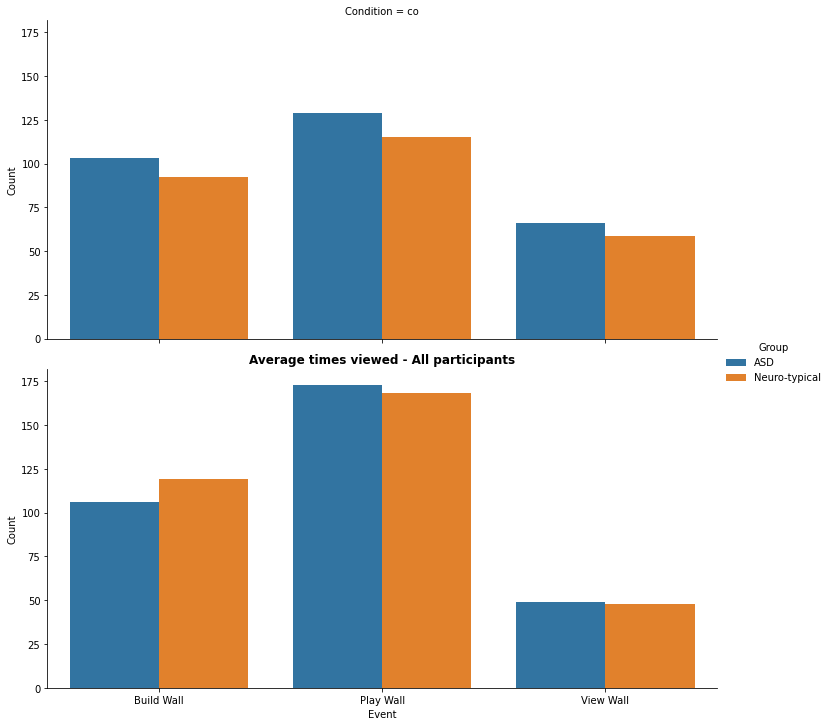

In [123]:
g = sns.catplot(data=df_event_grouped, x="Event", y="Count", hue="Group", row="Condition", kind="bar", aspect=2)
g.set_xticklabels(["Build Wall", "Play Wall", "View Wall"])
plt.title("Average times viewed - All participants", fontweight="bold")


In [124]:
df_view_grouped = df_view.groupby(["Group", "Condition", "Event"])["Duration"].mean().reset_index()
df_view_grouped

,Group,Condition,Event,Duration
0,ASD,co,looking at Build wall,82818.367188
1,ASD,co,looking at Play wall,162346.640625
2,ASD,co,looking at View wall,3580.234375
3,ASD,s,looking at Build wall,82818.367188
4,ASD,s,looking at Play wall,162346.640625
5,ASD,s,looking at View wall,3580.234375
6,Neuro-typical,co,looking at Build wall,103645.210938
7,Neuro-typical,co,looking at Play wall,190146.000000
8,Neuro-typical,co,looking at View wall,44571.578125
9,Neuro-typical,s,looking at Build wall,103645.210938


Text(0.5, 1.0, 'Average duration spent at each wall - All participants')

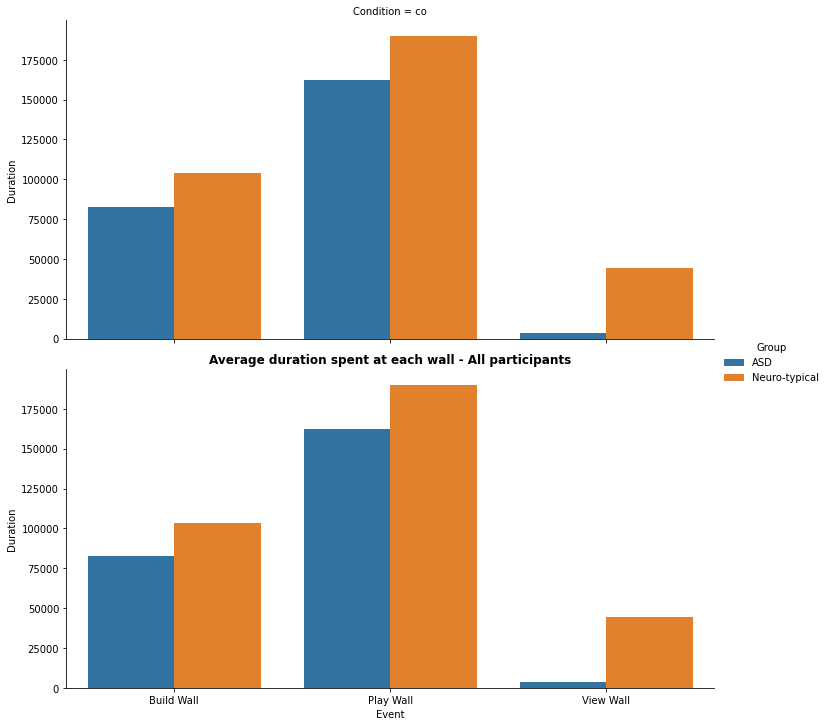

In [125]:
g = sns.catplot(data=df_view_grouped, x="Event", y="Duration", hue="Group", row="Condition", kind="bar", aspect=2)
g.set_xticklabels(["Build Wall", "Play Wall", "View Wall"])
plt.title("Average duration spent at each wall - All participants", fontweight="bold")

### Age selected participants

In [138]:
df_event, df_view = eyeAnalysis(df)

In [139]:
# Defining the groups
age_list = ["P10", "P11", "P12", "P14", "P16", "P2", "P20", "P21", "P25", "P28", \
    "P4", "P6", "P8", "P9"]
all_list = list(df.participant.unique())
asd_list = ["P2", "P3", "P4", "P6", "P7", "P8", "P10", "P11", "P12", "P14", "P16"]
nt_list = [x for x in age_list if x not in asd_list]

nt_list

['P20', 'P21', 'P25', 'P28', 'P9']

In [140]:
df_event.loc[df_event.Participant.isin(asd_list), "Group"] = "ASD"
df_event.loc[df_event.Participant.isin(nt_list), "Group"] = "Neuro-typical"

df_view.loc[df_view.Participant.isin(asd_list), "Group"] = "ASD"
df_view.loc[df_view.Participant.isin(nt_list), "Group"] = "Neuro-typical"

df_event.dropna(axis='index', inplace=True)
df_view.dropna(axis='index', inplace=True)

In [141]:
df_event["Count"] = df_event.Count.astype('int32')
df_view["Duration"] = df_view.Duration.astype('float32')
df_view["Duration"] = df_view.Duration / 10000

In [142]:
df_event_grouped = df_event.groupby(["Group", "Condition", "Event"])["Count"].mean().reset_index()
df_event_grouped

,Group,Condition,Event,Count
0,ASD,co,looking at Build wall,103.090909
1,ASD,co,looking at Play wall,128.727273
2,ASD,co,looking at View wall,66.181818
3,ASD,s,looking at Build wall,106.363636
4,ASD,s,looking at Play wall,173.090909
5,ASD,s,looking at View wall,48.727273
6,Neuro-typical,co,looking at Build wall,90.400000
7,Neuro-typical,co,looking at Play wall,105.000000
8,Neuro-typical,co,looking at View wall,51.000000
9,Neuro-typical,s,looking at Build wall,134.800000


Text(0.5, 1.0, 'Average times viewed - Age selected participants')

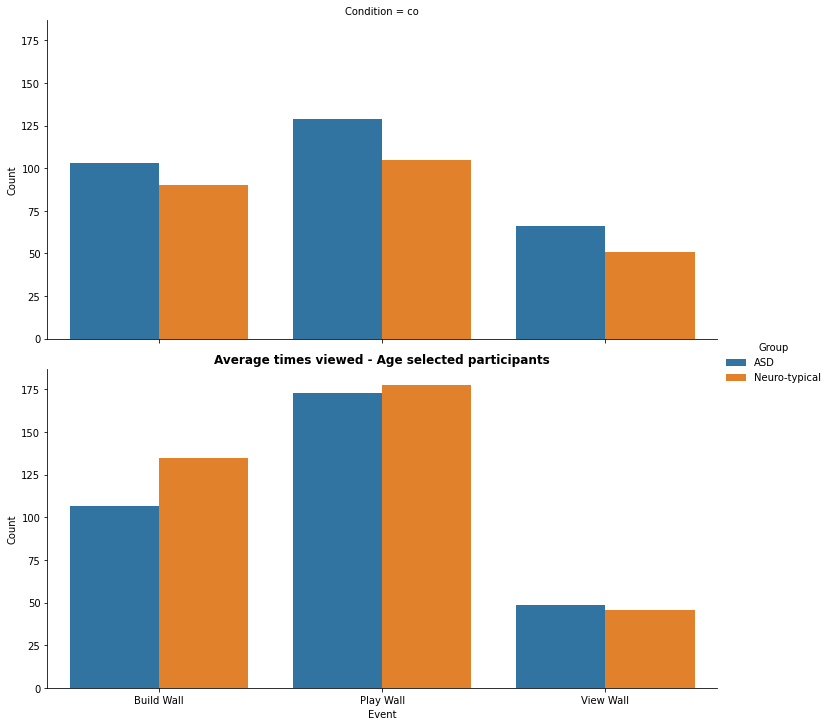

In [143]:
g = sns.catplot(data=df_event_grouped, x="Event", y="Count", hue="Group", row="Condition", kind="bar", aspect=2)
g.set_xticklabels(["Build Wall", "Play Wall", "View Wall"])
plt.title("Average times viewed - Age selected participants", fontweight="bold")


In [144]:
df_view_grouped = df_view.groupby(["Group", "Condition", "Event"])["Duration"].mean().reset_index()
df_view_grouped

,Group,Condition,Event,Duration
0,ASD,co,looking at Build wall,82818.367188
1,ASD,co,looking at Play wall,162346.640625
2,ASD,co,looking at View wall,3580.234375
3,ASD,s,looking at Build wall,82818.367188
4,ASD,s,looking at Play wall,162346.640625
5,ASD,s,looking at View wall,3580.234375
6,Neuro-typical,co,looking at Build wall,140776.140625
7,Neuro-typical,co,looking at Play wall,186296.765625
8,Neuro-typical,co,looking at View wall,50570.152344
9,Neuro-typical,s,looking at Build wall,140776.140625


Text(0.5, 1.0, 'Average duration spent at each wall - Age selected participants')

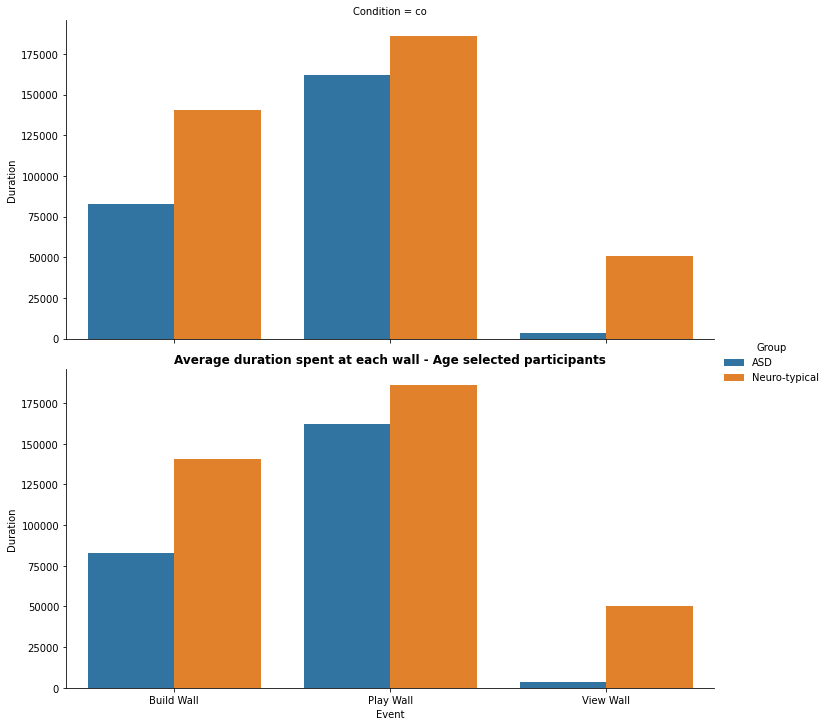

In [145]:
g = sns.catplot(data=df_view_grouped, x="Event", y="Duration", hue="Group", row="Condition", kind="bar", aspect=2)
g.set_xticklabels(["Build Wall", "Play Wall", "View Wall"])
plt.title("Average duration spent at each wall - Age selected participants", fontweight="bold")

### Transfer times analysis

In [3]:
df = pd.read_csv("Loom Data/P14/analytics2.csv")
df.head()

,TimeStamp,participant,Condition,Tiral,Age,Gender,SessionTime,Event,xPos,yPos,zPos
0,637959143150202443,P14,tut,1,22,m,NaN,looking at View wall,4.97,5.0,-9.85
1,637959143150312462,P14,tut,1,22,m,NaN,looking at View wall,4.97,5.0,-9.85
2,637959143150412494,P14,tut,1,22,m,NaN,looking at View wall,4.97,5.0,-9.85
3,637959143150522508,P14,tut,1,22,m,NaN,looking at View wall,4.97,5.0,-9.85
4,637959143150632532,P14,tut,1,22,m,NaN,looking at View wall,4.97,5.0,-9.85


In [4]:
dfs = df[df.Condition == "s"]
mask = dfs.Event.ne(dfs.Event.shift(1))
dfs_unique = dfs[mask]

In [5]:
dfs_unique.Event.unique()

array(['looking at Play wall', 'looking at View wall', 'Game Start',
       'Regular Gold Cube(Clone) was picked up',
       'Regular Blue Cube(Clone) was picked up', 'looking at Build wall',
       'Regular Blue Cube(Clone)was placed in dropzone',
       'Regular Red Cube(Clone) was picked up',
       'Regular Red Cube(Clone)was placed in dropzone',
       'Regular Neutral Cube(Clone) was picked up',
       'Regular Neutral Cube(Clone)was placed in dropzone',
       'Regular Gold Cube(Clone)was placed in dropzone', 'Game Over'],
      dtype=object)

In [6]:
# Drop other events 

events_of_interest = ['looking at Play wall', 'looking at View wall', 'looking at Build wall']
dfs_unique = dfs_unique[dfs_unique.Event.isin(events_of_interest)]

dfs_unique.Event.unique()

array(['looking at Play wall', 'looking at View wall',
       'looking at Build wall'], dtype=object)

Count the number of times looked at the wall 

In [7]:
dfs_unique.Event.value_counts()

looking at Play wall     228
looking at Build wall    183
looking at View wall      51
Name: Event, dtype: int64

### Average Duration at each wall 

In [30]:
dfs = df[df.Condition == "s"]
mask = dfs.Event.ne(dfs.Event.shift(1))
dfs_unique = dfs[mask]

events_of_interest = ['looking at Play wall', 'looking at View wall', 'looking at Build wall']
dfs_unique = dfs_unique[dfs_unique.Event.isin(events_of_interest)]

In [31]:
dfs_diff = pd.concat([dfs_unique, dfs_unique.tail(1)], ignore_index=True)
dfs_diff["TimeDiff"] = dfs_diff.TimeStamp.diff(-1)
dfs_diff["TimeDiff"] *= -1

dfs_diff.head()

,TimeStamp,participant,Condition,Tiral,Age,Gender,SessionTime,Event,xPos,yPos,zPos,TimeDiff
0,637959144612359276,P14,s,1,22,m,NaN,looking at Play wall,1.26,11.20539,-0.303214,3200725.0
1,637959144615560001,P14,s,1,22,m,NaN,looking at View wall,4.97,5.00000,-9.850000,26936096.0
2,637959144642496097,P14,s,1,22,m,NaN,looking at Play wall,1.26,11.20539,-0.303214,11294613.0
3,637959144653790710,P14,s,1,22,m,NaN,looking at View wall,4.97,5.00000,-9.850000,28313021.0
4,637959144682103731,P14,s,1,22,m,NaN,looking at Play wall,1.26,11.20539,-0.303214,4700636.0


In [34]:
dfs_diff.groupby("Event").TimeDiff.sum()

Event
looking at Build wall    2.291830e+09
looking at Play wall     1.783228e+09
looking at View wall     6.155240e+08
Name: TimeDiff, dtype: float64

## 3D plot analysis - NOT WORKING

In [41]:
eye_df = pd.read_csv("./Loom Data 09:20/Loom Data/P28/analytics2.csv")

In [42]:
eye_df.head()

,TimeStamp,participant,Condition,Tiral,Age,Gender,SessionTime,Event,xPos,yPos,zPos,Group
0,637992794425555450,P28,tut,1,20,m,NaN,looking at Play wall,2.802482,7.035258,-3.316415,c
1,637992794425764746,P28,tut,1,20,m,NaN,looking at Play wall,2.802482,6.920973,-3.035687,c
2,637992794425994342,P28,tut,1,20,m,NaN,looking at Play wall,2.802482,6.930407,-3.012243,c
3,637992794426213563,P28,tut,1,20,m,NaN,looking at Play wall,2.802482,6.915554,-2.992088,c
4,637992794426432510,P28,tut,1,20,m,NaN,looking at Play wall,2.802482,6.951162,-3.009470,c


In [43]:
eye_df.Condition.unique()

array(['tut', 's', 'co'], dtype=object)

In [44]:
df_s = eye_df[eye_df.Condition == "s"]

events_to_remove = ["Game Start", "Game Over"]
df_s = df_s[~df_s.Event.isin(events_to_remove)]

In [82]:
import plotly.graph_objects as go



fig = go.Figure(data=[go.Scatter3d(x=df_s['xPos'], y=df_s['yPos'], z=df_s['zPos'], \
                mode='lines')],
                layout=go.Layout(
                    xaxis=dict(range=[-25, 25], autorange=False),
                    yaxis=dict(range=[-25, 25], autorange=False),
                    updatemenus=[dict(type="buttons",
                        buttons=[dict(label="Play",
                        method="animate",
                        args=[dict(frame=[dict(duration=30)], 
                                    transition=[dict(duration=30)])])]
                )]),
                frames=[go.Frame(data=[go.Scatter3d(x=[df_s.loc[k, 'xPos']], y=[df_s.loc[k, 'yPos']], z=[df_s.loc[k, 'zPos']], 
                mode='markers')], 
                # layout=go.Layout(
                #     xaxis=dict(range=[-25, 25], autorange=False),
                #     yaxis=dict(range=[-25, 25], autorange=False)),
                )
                for k in df_s.index
                ]
                )


# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.layout.updatemenus[0].buttons[0].args[0]['frame']['duration'] = 30
# fig.layout.updatemenus[0].buttons[0].args[0]['transition']['duration'] = 5
fig.show()

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=[-100,100],),
#                      yaxis = dict(nticks=4, range=[-50,100],),
#                      zaxis = dict(nticks=4, range=[-100,100],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))


In [76]:
fig.layout.updatemenus[0].buttons[0]

layout.updatemenu.Button({
    'args': [None], 'label': 'Play', 'method': 'animate'
})